<center>

### COSC2753 - Machine Learning

# **Model Development - Artificial Neural Network (ANN)**

<center>────────────────────────────</center>
&nbsp;


# I. Introduction

In this notebook, we will focus on the development of an Artificial Neural Network (ANN) model. This process will involve training the ANN model on preprocessed image data, optimizing its performance through hyperparameter tuning, and evaluating its effectiveness. Specifically, we will perform the following steps:

- **Training:** We will train the selected ANN model using the preprocessed image data. This involves feeding the data into the model and adjusting its parameters to minimize the loss function.

- **Hyperparameter Tuning:** We will explore different combinations of hyperparameters to optimize the performance of our ANN model. This may include tuning parameters such as learning rate, batch size, and regularization strength.

- **Model Evaluation:** After training and tuning the ANN model, we will evaluate its performance using appropriate evaluation metrics. This step will help us assess how well the model generalizes to unseen data and determine its effectiveness in predicting labels for new images in the dataset.

By the end of this notebook, we will have developed a well-trained ANN model and evaluated its performance, providing insights into its effectiveness for image recognition tasks. This model will serve as a foundation for further analysis and applications in image classification.

# II. ANN Model

## 1. Initial Setup

In [1]:
# Import necessary packages
import pandas as pd  # Data manipulation
import sys  # System specific parameters and functions
import importlib  # Importing modules
import tensorflow as tf  # Machine learning
import graphviz  # Visualization
from sklearn.model_selection import train_test_split  # Split for train and test
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Image data generator
from keras.optimizers import Adam

# Reload modules
sys.path.append("../../")  # Root directory
modules_to_reload = ["scripts.leon", "scripts.styler"]

# Reload modules if they have been modified
missing_modules = []

for module_name in modules_to_reload:
    if module_name in sys.modules:
        importlib.reload(sys.modules[module_name])
    else:
        missing_modules.append(module_name)

# Recache missing modules
if missing_modules:
    print(f"Modules {missing_modules} not found. Recaching...")

# Import user-defined scripts
from scripts.leon import Leon  # Leon class
from scripts.styler import Styler  # Styler class

# Configuration
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.precision", 3)

# Initialize objects
leon = Leon()
styler = Styler()

# Environment information
print("TF version:", tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Modules ['scripts.leon', 'scripts.styler'] not found. Recaching...

        @|\@@
       -  @@@@                                                            LEON 1.0.0
      /7   @@@@                                         This is Leon, the friendly lion. He is here to help you
     /    @@@@@@                                     Leon is tailored to manipulate images, data and visualizations
     \-' @@@@@@@@`-_______________                                      Made by: Team X
      -@@@@@@@@@             /    \                                     Version: 1.0.3
 _______/    /_       ______/      |__________-
/,__________/  `-.___/,_____________----------_)

TF version: 2.16.1
GPU is NOT AVAILABLE


## 2. Load Dataset

We will load the training dataset after processing from the Preprocessing phase and the testing dataset.

In [9]:
## Load the processed training dataset to dataframe
df_process_train = pd.read_csv("../../data/processed/train.csv",delimiter=',')
df_test = pd.read_csv("../../data/test/test.csv",delimiter=',')

In [10]:
# Display info of the training set
df_process_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196626 entries, 0 to 196625
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Path      196626 non-null  object 
 1   Category  196626 non-null  object 
 2   Style     196626 non-null  object 
 3   Width     196626 non-null  int64  
 4   Height    196626 non-null  int64  
 5   MinValue  196626 non-null  int64  
 6   MaxValue  196626 non-null  int64  
 7   StdDev    196626 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 12.0+ MB


In [11]:
# Display the first few rows of the filtered DataFrame
df_process_train.head()

,Path,Category,Style,Width,Height,MinValue,MaxValue,StdDev
0,..\..\data\raw\Furniture_Data\Furniture_Data\d...,dressers,Asian,256,256,0,255,78.264
1,..\..\data\raw\Furniture_Data\Furniture_Data\l...,lamps,Asian,256,256,0,255,56.407
2,..\..\data\raw\Furniture_Data\Furniture_Data\d...,dressers,Asian,256,256,0,255,69.653
3,..\..\data\raw\Furniture_Data\Furniture_Data\l...,lamps,Asian,256,256,5,255,84.765
4,..\..\data\raw\Furniture_Data\Furniture_Data\l...,lamps,Asian,256,256,2,255,56.765


In [12]:
df_process_train["Category"].value_counts()

Category
lamps       62715
chairs      50064
tables      40071
dressers    18483
beds        15702
sofas        9591
Name: count, dtype: int64

## 3. Data Splitting
We will split the data to the radio 60/20/20 to train/validation/test.

In [13]:
# Split the training dataset into training and validation sets with 60/20/20 (train/val/test) ratio
train, val = train_test_split(df_process_train, shuffle=True, test_size=0.25, random_state=42)

## 4. Model Development

### 4.1. Hyper-parameters

In [14]:
INPUT_DIM = (256, 256, 3) # RGB - 3 channels images
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 6
BATCH_SIZE = 32
EPOCH = 32

### 4.2. Model Architecture

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
], name = "Simple_ANN")

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['categorical_accuracy'],
)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "Simple_ANN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    50,331,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,333,446 (192.01 MB)

 Trainable params: 50,333,446 (192.01 MB)

 Non-trainable params: 0 (0.00 B)

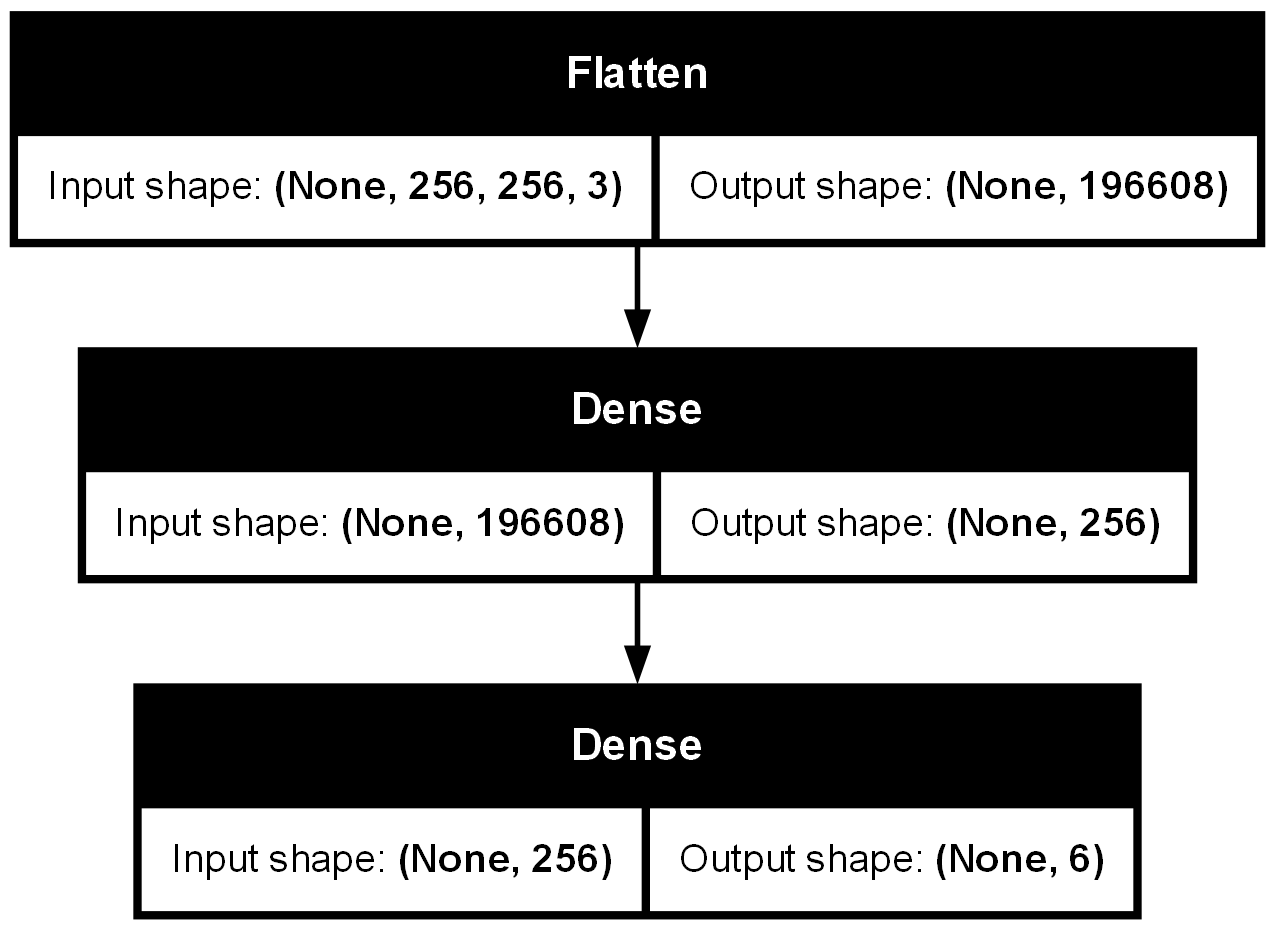

In [25]:
tf.keras.utils.plot_model(model, show_shapes=True)

### 4.3. Model Training

In [26]:
train['Category'] = train['Category'].astype('str')
val['Category'] = val['Category'].astype('str')
train['Category'].value_counts()

Category
lamps       47189
chairs      37521
tables      29955
dressers    13817
beds        11807
sofas        7180
Name: count, dtype: int64

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

In [32]:
train_generator = train_datagen.flow_from_dataframe(
        dataframe=train,
        directory="../../data/processed",
        x_col="Path",
        y_col="Category",
        target_size=(256, 256),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val,
        directory="../../data/processed",
        x_col="Path",
        y_col="Category",
        target_size=(256, 256),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 147469 validated image filenames belonging to 6 classes.
Found 49157 validated image filenames belonging to 6 classes.


In [33]:
# Print all classes
print(train_generator.class_indices)

{'beds': 0, 'chairs': 1, 'dressers': 2, 'lamps': 3, 'sofas': 4, 'tables': 5}


In [34]:
history = model.fit(
    train_generator, validation_data=validation_generator,
    epochs=EPOCH,
    verbose=2,
)

Epoch 1/32


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4609/4609 - 1259s - 273ms/step - categorical_accuracy: 0.3092 - loss: 1.6187 - val_categorical_accuracy: 0.3158 - val_loss: 1.6211
Epoch 2/32


KeyboardInterrupt: 

### 4.4. Model Evaluation

In [ ]:
df_test['Category'] = df_test['Category'].astype('str')
test_datagen = ImageDataGenerator(data_format='channels_last')
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory="../../data/test",
    x_col='Path',
    y_col='Category',
    target_size=(256, 256),
    batch_size=1,
    class_mode='categorical',
)